<a href="https://colab.research.google.com/github/abbybaumgarten/IMT_542_I3/blob/main/imt542_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
os.listdir('/content')


['.config', 'drive', 'sample_data']

In [17]:
import pandas as pd

# Read the CSV from the /var folder
df = pd.read_csv('/world_indicators.csv')

# Display the first few rows
df.head()


,Country Name,Life expectancy,Population,Literacy rate,GDP per capita
0,Country 1,66.24,290905804.0,51.57,15129.31
1,Country 2,83.52,232764714.0,81.82,21235.09
2,Country 3,76.96,281910184.0,65.72,18309.23
3,Country 4,72.96,268553378.0,75.43,17544.99
4,Country 5,59.68,179772094.0,95.38,19850.72


In [18]:
import os

os.listdir('/var/cache/PackageKit')

['downloads']

In [19]:
df.head()
df.columns


Index(['Country Name', 'Life expectancy', 'Population', 'Literacy rate',
       'GDP per capita'],
      dtype='object')

In [21]:
# Drop rows with missing values
df = df.dropna()

# Separate features and target
X = df[['Life expectancy', 'Population', 'Literacy rate']]
y = df['GDP per capita']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Check performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 617979.90


In [23]:
# Example input: life expectancy, population, literacy rate
example = [[75, 5_000_000, 90]]

# Predict GDP per capita
predicted_gdp = model.predict(example)
print(f"Predicted GDP per capita: ${predicted_gdp[0]:,.2f}")


Predicted GDP per capita: $20,387.12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


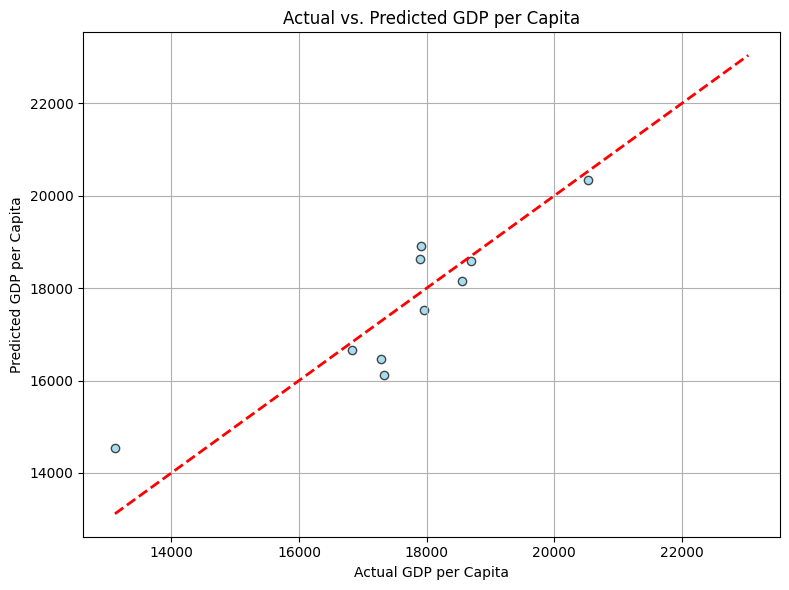

In [24]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolors='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, linestyle='--')
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.title('Actual vs. Predicted GDP per Capita')
plt.grid(True)
plt.tight_layout()
plt.show()


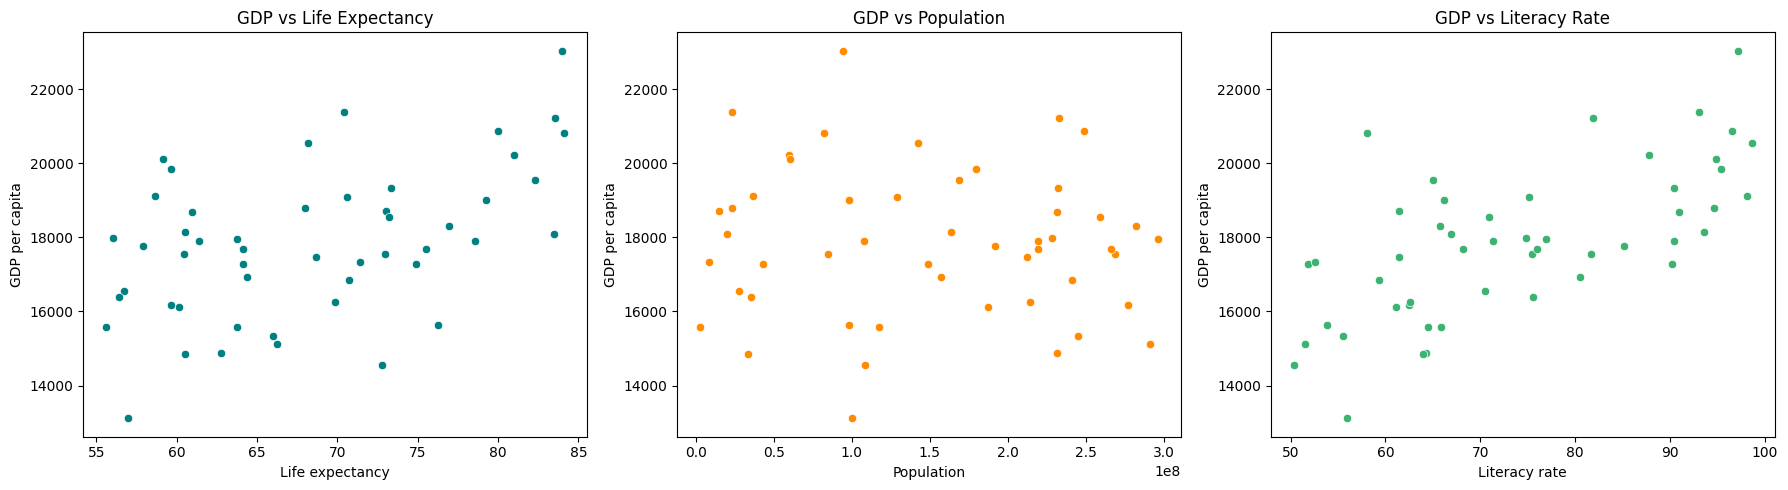

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the layout
plt.figure(figsize=(18, 5))

# Plot 1: GDP vs Life Expectancy
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Life expectancy', y='GDP per capita', color='teal')
plt.title('GDP vs Life Expectancy')

# Plot 2: GDP vs Population
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Population', y='GDP per capita', color='darkorange')
plt.title('GDP vs Population')

# Plot 3: GDP vs Literacy Rate
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Literacy rate', y='GDP per capita', color='mediumseagreen')
plt.title('GDP vs Literacy Rate')

plt.tight_layout()
plt.show()


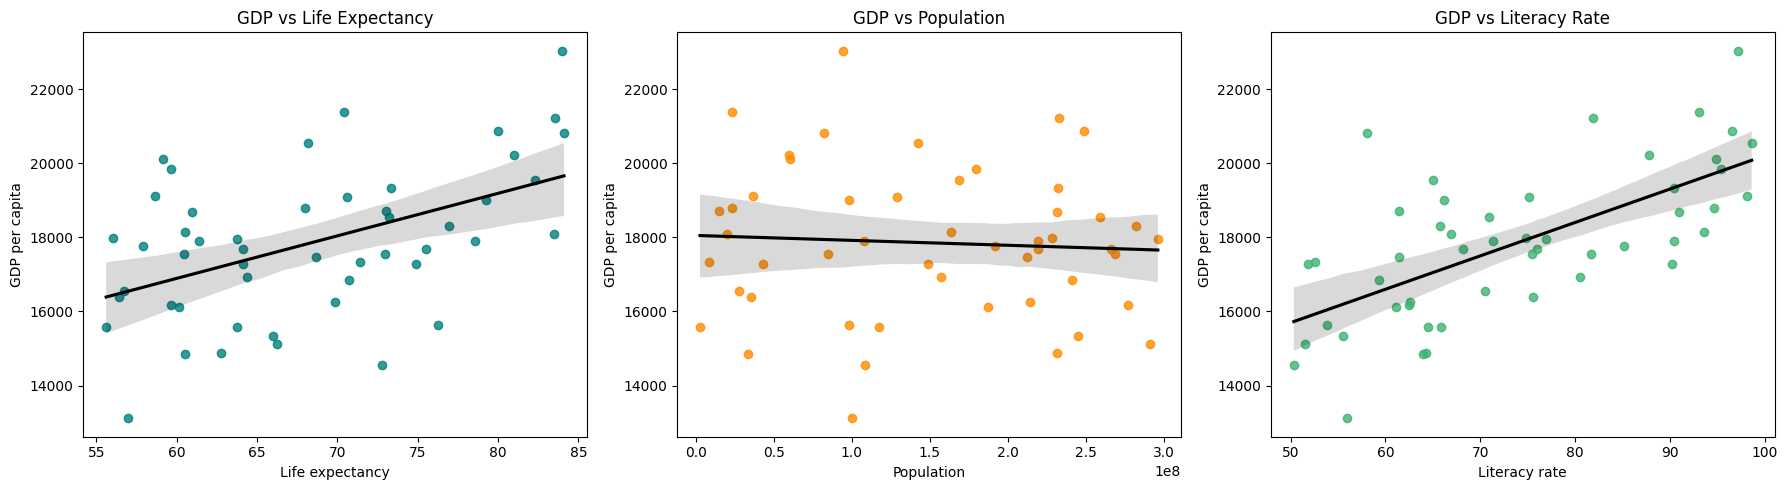

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the layout
plt.figure(figsize=(18, 5))

# Plot 1: GDP vs Life Expectancy with regression line
plt.subplot(1, 3, 1)
sns.regplot(data=df, x='Life expectancy', y='GDP per capita', color='teal', line_kws={"color": "black"})
plt.title('GDP vs Life Expectancy')

# Plot 2: GDP vs Population with regression line
plt.subplot(1, 3, 2)
sns.regplot(data=df, x='Population', y='GDP per capita', color='darkorange', line_kws={"color": "black"})
plt.title('GDP vs Population')

# Plot 3: GDP vs Literacy Rate with regression line
plt.subplot(1, 3, 3)
sns.regplot(data=df, x='Literacy rate', y='GDP per capita', color='mediumseagreen', line_kws={"color": "black"})
plt.title('GDP vs Literacy Rate')

# Save the figure
plt.tight_layout()
plt.savefig('gdp_vs_features.png')

# Show the plot
plt.show()


In [27]:
df.to_csv('cleaned_world_indicators.csv', index=False)
